In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
data=pd.read_csv(r"C:\Users\Micro\Downloads\AQI\nizamabad.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    84 non-null     object 
 1   AQI     84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [86]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index(data["Date"],inplace=True)
data.drop(["Date"],axis=1,inplace=True)

In [87]:
original=data.copy()
data=data[:60]

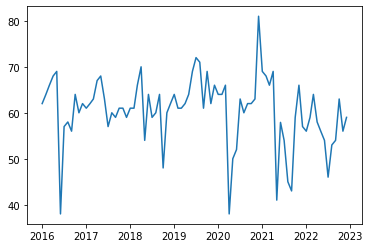

In [99]:
plt.plot(original)

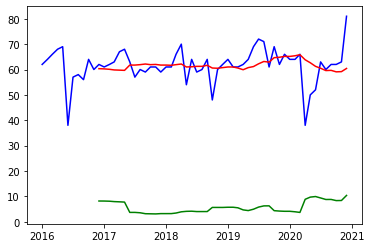

In [88]:
roll_mean = data.rolling(window=12).mean()
roll_std = data.rolling(window=12).std()
plt.plot(data,c='blue')
plt.plot(roll_mean,c='red')
plt.plot(roll_std,c='green')

In [89]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data["AQI"])
print(dftest)

(-4.310900074032753, 0.00042529693246188687, 9, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 311.975134720229)


In [90]:
shift1=data.AQI-data.AQI.shift(1)
shift1=pd.DataFrame(shift1)
adfuller(shift1.dropna())

(-4.099103210139966,
 0.0009718355431278948,
 11,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 313.1982773836162)

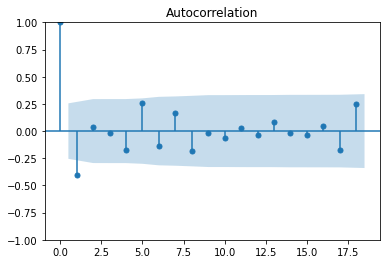

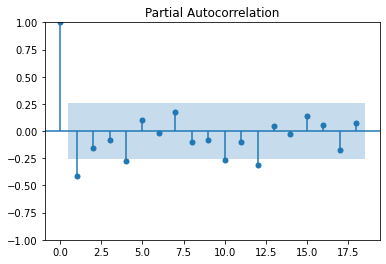

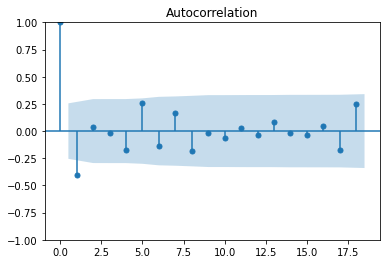

In [91]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(shift1.AQI.dropna())
plot_acf(shift1.AQI.dropna())

In [92]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data,seasonal_order=(1,1,1,12)) 
model_fit = model.fit()

In [93]:
res=model_fit.forecast(24)
res

2021-01-01    64.300865
2021-02-01    63.397039
2021-03-01    63.591046
2021-04-01    39.812163
2021-05-01    55.570529
2021-06-01    58.921303
2021-07-01    66.012752
2021-08-01    63.614431
2021-09-01    61.096039
2021-10-01    67.720298
2021-11-01    63.450439
2021-12-01    78.438286
2022-01-01    64.000138
2022-02-01    63.999724
2022-03-01    65.998899
2022-04-01    38.000828
2022-05-01    50.002547
2022-06-01    52.003164
2022-07-01    63.001377
2022-08-01    60.001652
2022-09-01    61.999587
2022-10-01    62.002615
2022-11-01    63.000206
2022-12-01    80.998829
Freq: MS, Name: predicted_mean, dtype: float64

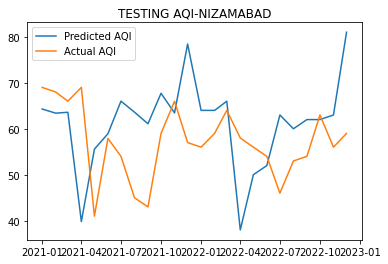

In [98]:
plt.plot(res,label="Predicted AQI")
plt.plot(original[60:],label="Actual AQI")
plt.title("TESTING AQI-NIZAMABAD")
plt.legend()

In [97]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(original.AQI[60:].values,res)

0.18745488606488006

In [95]:
#res=pd.DataFrame(res)
#forecast using whole data

In [96]:
#res.to_csv(r"C:\Users\Micro\Downloads\AQI\aqipred_nizamabad.csv")